In [ ]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)


In [ ]:
df= pd.read_parquet(r"C:\Users\ROHIT\Documents\class noyts\Datasets and Dictionary\trip_records\2023-3.parquet")
df.head()

In [ ]:
df.shape

In [ ]:
sample=hour_data.sample(frac=0.05,random_state=42)

In [ ]:
df.info()


In [ ]:
100*df.isnull().mean()

In [ ]:
df['store_and_fwd_flag'].nunique()


In [ ]:
df['RatecodeID'].unique()

In [ ]:
## in this Ratecode id  colume we replace the nan values by 'zeros'

In [ ]:
df.loc[df['RatecodeID']== 'nan','RatecodeID']='0.0'

In [ ]:
## in this dataset we observed that store_and_fwd_flag has one the most missing values coulmes, so we drop that colume

In [ ]:
df=df.drop('store_and_fwd_flag',axis=1)

In [133]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.4,1.0,140,238,1,21.9,3.5,0.5,6.7,0.0,1.0,33.6,2.5,0.0
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.4,1.0,50,151,1,15.6,3.5,0.5,3.0,0.0,1.0,23.6,2.5,0.0


In [ ]:
df['Airport_fee'].unique()

In [ ]:
## in 'Airport_fee' we observed that $1.25 for pick up only at LaGuardia and John F. Kennedy Airports. so we extrack those values only. 
## before that we will transfrom '1.75' value in 2 and '-1.75' in 1 


In [ ]:
df.loc[df['Airport_fee']== '1.75','Airport_fee']='2'

In [ ]:
df.loc[df['Airport_fee']== '-1.75','Airport_fee']='1'

In [ ]:
df.info()

In [ ]:
## now we perfrom some eda  steps


In [ ]:
df.head(2)

In [ ]:
df.passenger_count.value_counts()

In [ ]:
df.passenger_count.plot.barh()
plt.show()


In [135]:
df.groupby(['passenger_count'])['fare_amount'].mean()

passenger_count
0.0    17.659131
1.0    19.517191
2.0    22.580120
3.0    25.230289
4.0    24.185696
5.0    19.653579
6.0    19.449163
7.0    73.883333
8.0    84.135417
9.0    92.666667
Name: fare_amount, dtype: float64

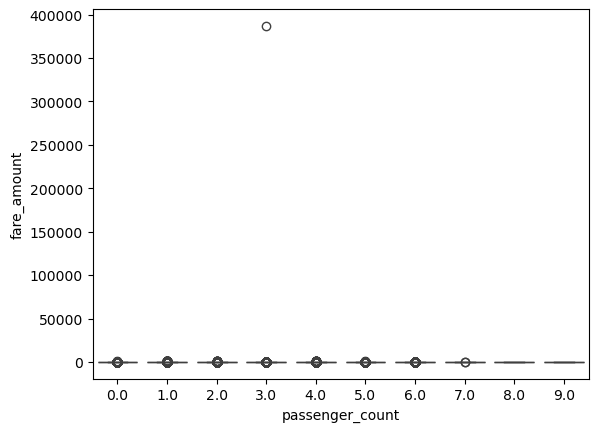

In [142]:
sns.boxplot(data=df,x='passenger_count',y='fare_amount')
plt.show()

In [146]:
df.groupby('passenger_count')['fare_amount'].mean().plot.barh()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [163]:
pd.pivot_table(data=df,index='passenger_count',columns='fare_amount',value='Airport_fee')
sns.heatmap()

TypeError: pivot_table() got an unexpected keyword argument 'value'